50.0
50.0


Text(0.5, 1.0, 'Effective Hoop Stress Around Wellbore')

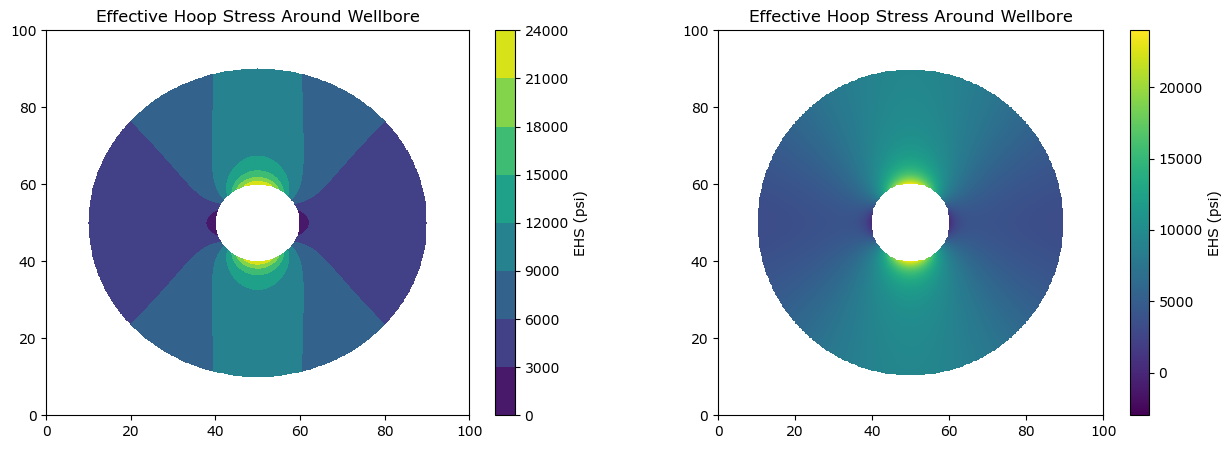

In [31]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.arange(0, 180, 1) # azimuth from the Shmax direction
Shmax = 13000 # psi
Shmin = 7000 # psi
pp = 4000 # psi
pmud = 4000 # psi
R0=10 # Borehole radius, could be cm

#theta = np.pi * angle / 180  # Convert angle to radians using numpy
#EffHoopS = 0.5 * (Shmax + Shmin - 2 * pp) * (1 + 1 / R) - 0.5 * (Shmax - Shmin) * (1 + 3 / R ** 2) * np.cos(2 * theta) - (pmud - pp) / R

# Create a 3D grid where we want to estimate stress concentration
x_grid = np.linspace(0, 100, 501)
y_grid = np.linspace(0, 100, 501)
depth_grid = np.linspace(0, 1000, 51)

# Initialize EHS model
EHS_model = np.zeros((len(x_grid), len(y_grid), len(depth_grid)))

# Find the center of the 3D grid as the borehore center
x_center_index = len(x_grid)//2 # Find the center index
x_center = x_grid[x_center_index]
y_center_index = len(y_grid)// 2 # Find the center index
y_center = y_grid[y_center_index]

print(x_center)
print(y_center)

for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        dx = x_grid[i] - x_center
        dy = y_grid[j] - y_center
        R=(dx**2+dy**2)**(1/2) / R0 # Normalized radius
        R=R**2 # R square
        theta = np.arctan2(dy, dx)
        
        if 1 <= R <= 16:  # Apply the mute condition
            EHS_model[i, j, :] = (
                0.5 * (Shmax + Shmin - 2 * pp) * (1 + 1 / R) 
                - 0.5 * (Shmax - Shmin) * (1 + 3 / R**2) * np.cos(2 * theta) 
                - (pmud - pp) / R
            )
        else:
            EHS_model[i, j, :] = np.nan
        
        #print(R)

# Display EHS model
depth_index = 0
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.contourf(x_grid,y_grid,EHS_model[:,:,depth_index].T)
plt.colorbar(label='EHS (psi)')
plt.title('Effective Hoop Stress Around Wellbore')

plt.subplot(1,2,2)
plt.imshow(EHS_model[:,:,depth_index].T,extent=(0,100,0,100),vmin=-3000,vmax=24000)
plt.colorbar(label='EHS (psi)')
plt.title('Effective Hoop Stress Around Wellbore')


Text(0.5, 1.0, 'Effective Hoop Stress Around Wellbore')

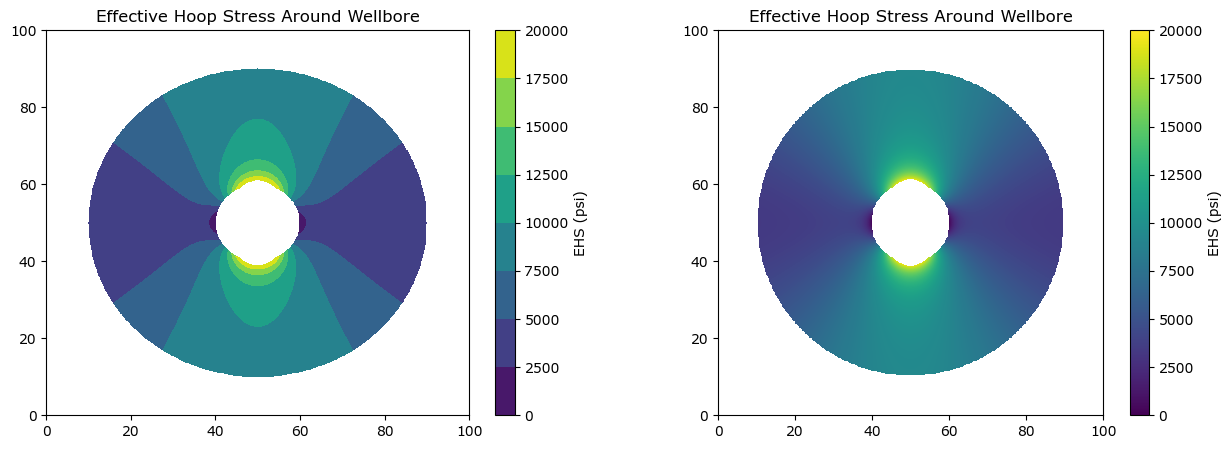

In [32]:
# Display the area of wellbore breakout

# Set rock strength C0
C0=20000 # psi

# Mute when EHS<C0
EHS_model[EHS_model>C0]=np.nan
EHS_model[EHS_model<0]=np.nan

# Display EHS model
depth_index = 0
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.contourf(x_grid,y_grid,EHS_model[:,:,depth_index].T)
plt.colorbar(label='EHS (psi)')
plt.title('Effective Hoop Stress Around Wellbore')

plt.subplot(1,2,2)
plt.imshow(EHS_model[:,:,depth_index].T,extent=(0,100,0,100),vmin=0,vmax=20000)
plt.colorbar(label='EHS (psi)')
plt.title('Effective Hoop Stress Around Wellbore')